<a href="https://colab.research.google.com/github/kye934/kye934/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [20]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
# Write your code here
numOfRows = len(df)
numOfCols = len(df.columns)
print("Number of rows: ", numOfRows)
print("Number of columns: ", numOfCols)


Number of rows:  1898
Number of columns:  9


#### Observations:
Number of rows:  1898

Number of columns:  9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
dataType = df.info()
print(dataType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None




```
# This is formatted as code
```

#### Observations: Column 1-2 are int data types (dt); 2-4 are object dt; 5 is a float dt; 6-7 are object dt; 8-9 are int dt.
Total dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# The only missing values in the data are for orders that did not get a review ("Not given")
# Write your code here

if df.isnull().any().any():
  print("There are missing values in the data")


else:
  print("There are no missing values in the data")

reviewList = df['rating'].replace('Not given', np.nan)

# for i in range(len(reviewList)):
#   print(reviewList[i])



  #  print(reviewList[i])
  #  print(type(reviewList[i]))
  #  break
#for i in reviewList

There are no missing values in the data


#### Observations:
There are no missing values in the data

However, it could be argued that the 'Not give' is a missing value in the rating list for which we have converted to np.nan (ie. None) for use in calculations later on as a variable called reviewList.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Write your code here
orderTime = df['food_preparation_time']
print("Minimum time: ", orderTime.min())
print("Average time: ", orderTime.mean())
print("Maximum time: ", orderTime.max())

Minimum time:  20
Average time:  27.371970495258168
Maximum time:  35


#### Observations:
Minimum time:  20

Average time:  27.371970495258168

Maximum time:  35

### **Question 5:** How many orders are not rated?

In [9]:
# Write the code here
orderUnrated = 0
reviewList = df['rating']
for i in reviewList:
  if i == 'Not given':
    orderUnrated += 1
print("Number of orders not rated: ", orderUnrated)


Number of orders not rated:  736


#### Observations:
Number of orders not rated:  736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

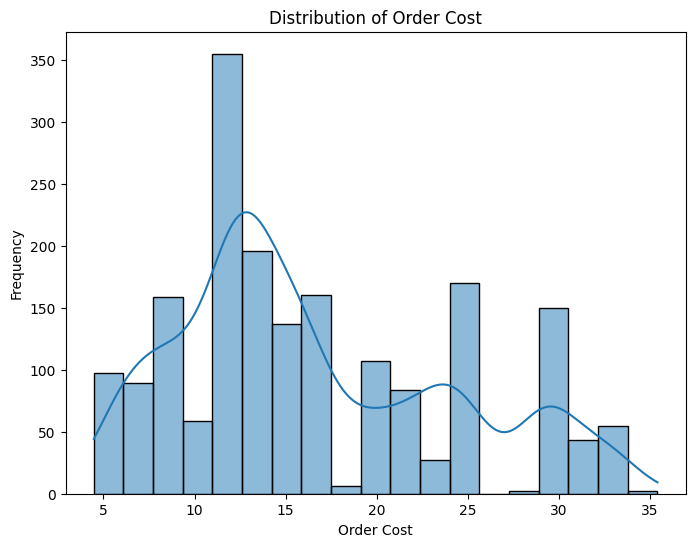

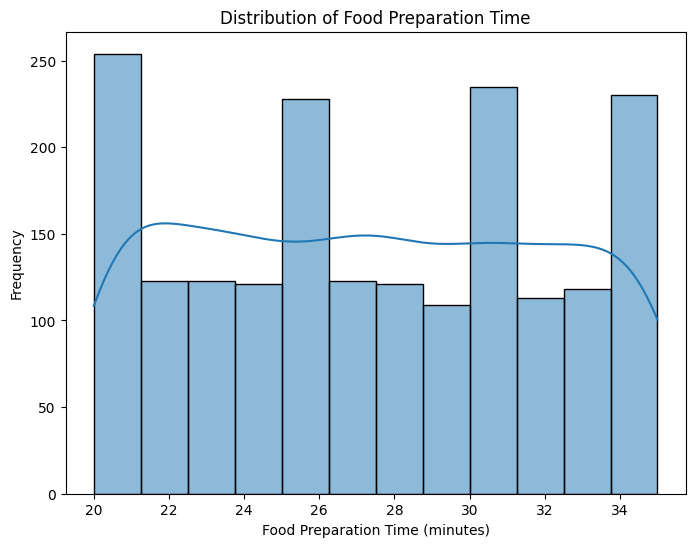

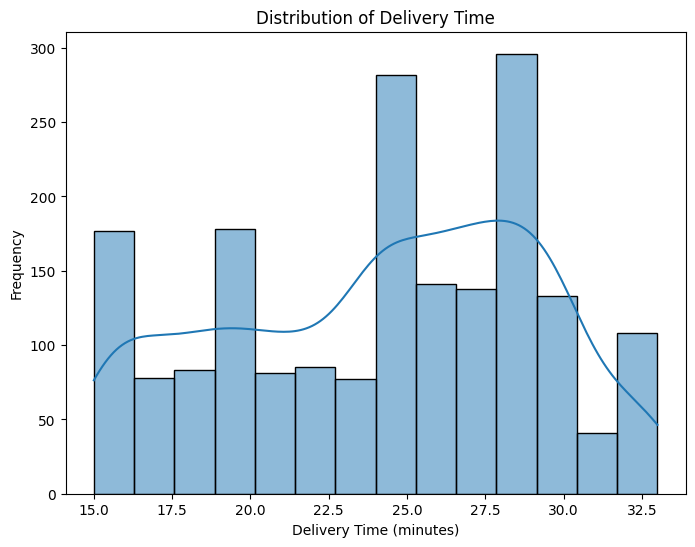

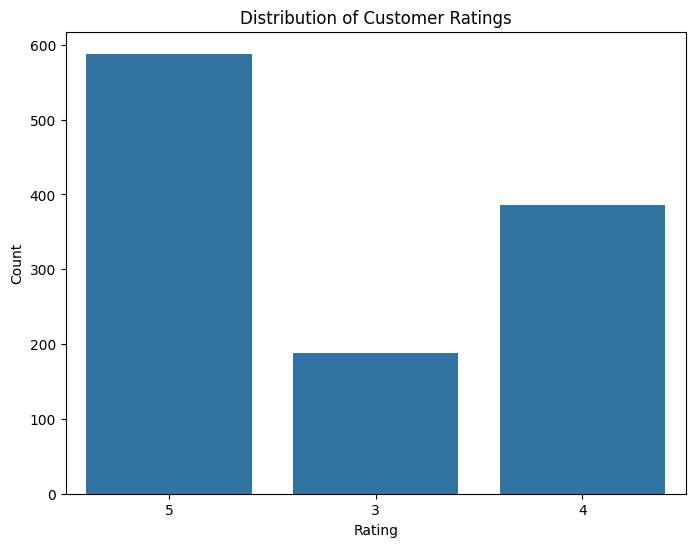

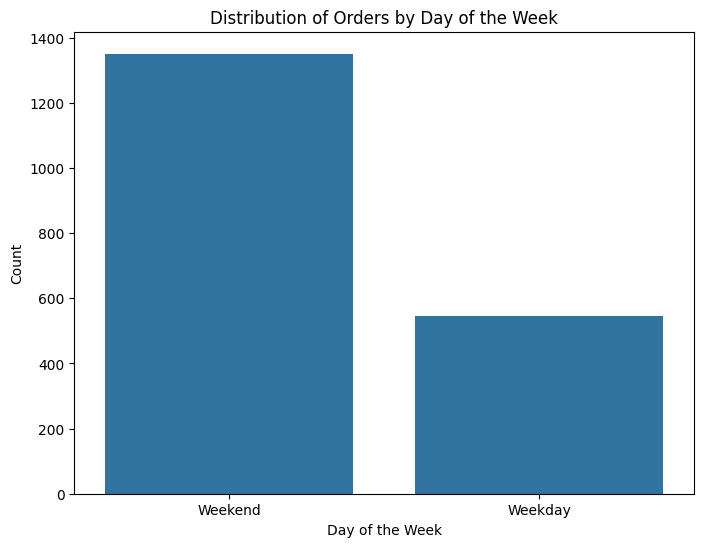

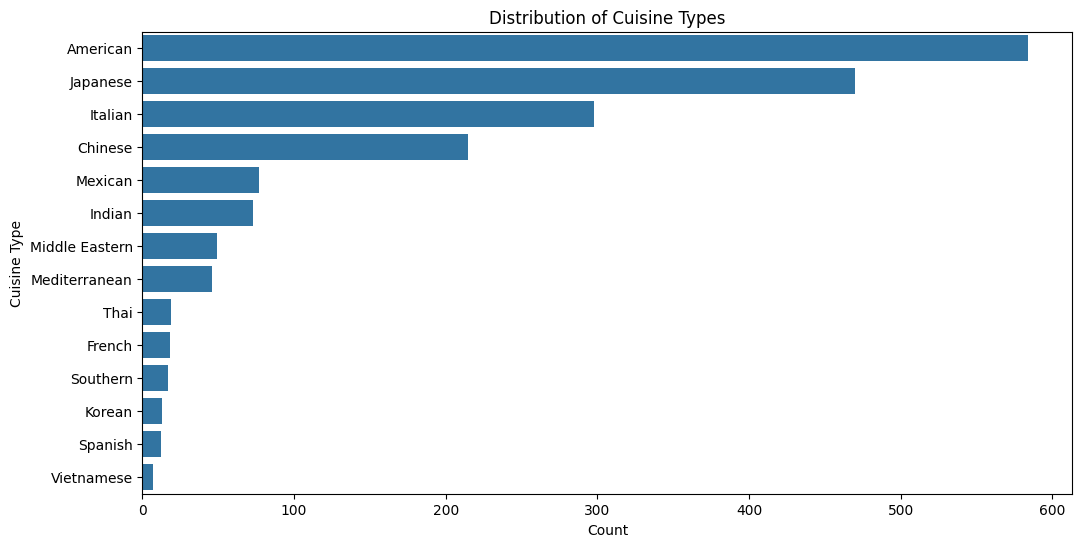

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


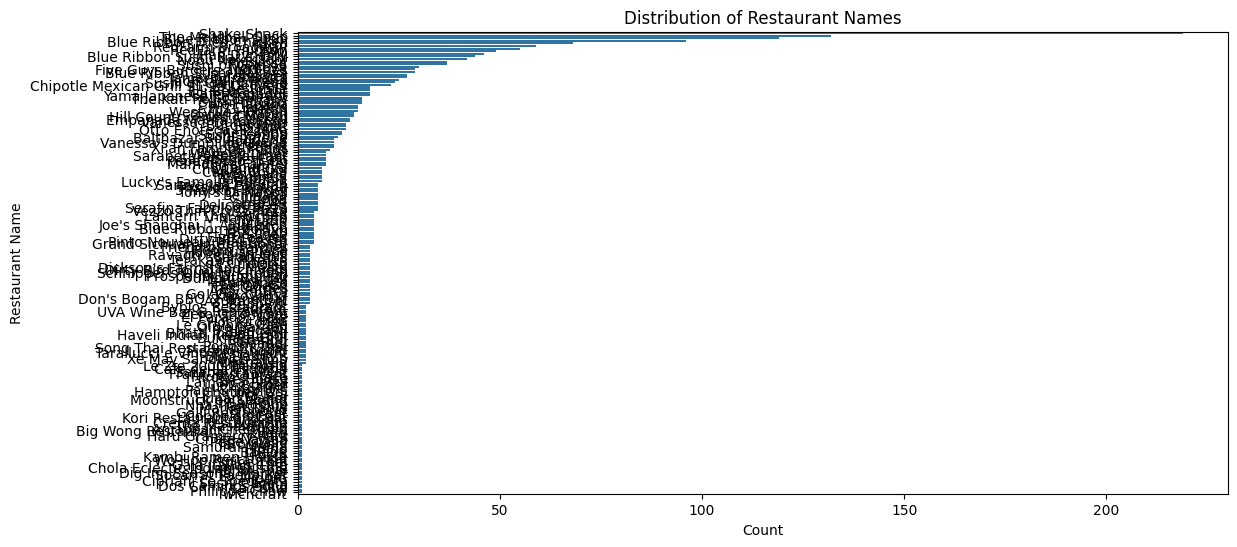

In [10]:
# prompt: # Write the code here
# Provide me code that Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

import matplotlib.pyplot as plt
import seaborn as sns

# Explore 'cost'
plt.figure(figsize=(8, 6))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
plt.show()

# Explore 'food_preparation_time'
plt.figure(figsize=(8, 6))
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Explore 'delivery_time'
plt.figure(figsize=(8, 6))
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Explore 'rating' (excluding 'Not given')
plt.figure(figsize=(8, 6))
sns.countplot(x=df['rating'].replace('Not given',None).dropna()) #Drop missing values for countplot
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Explore 'day_of_the_week'
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Explore 'cuisine_type'
plt.figure(figsize=(12, 6))
sns.countplot(y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index) #Order bars by frequency
plt.title('Distribution of Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

# Explore 'restaurant_name'
# display top 5 restaurants
plt.figure(figsize=(12, 6))
sns.countplot(y='restaurant_name', data=df, order=df['restaurant_name'].value_counts().index) #Order bars by frequency
plt.title('Distribution of Restaurant Names')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

Top 5 restaurants by order count:
Shake Shack : 219
The Meatball Shop : 132
Blue Ribbon Sushi : 119
Blue Ribbon Fried Chicken : 96
Parm : 68


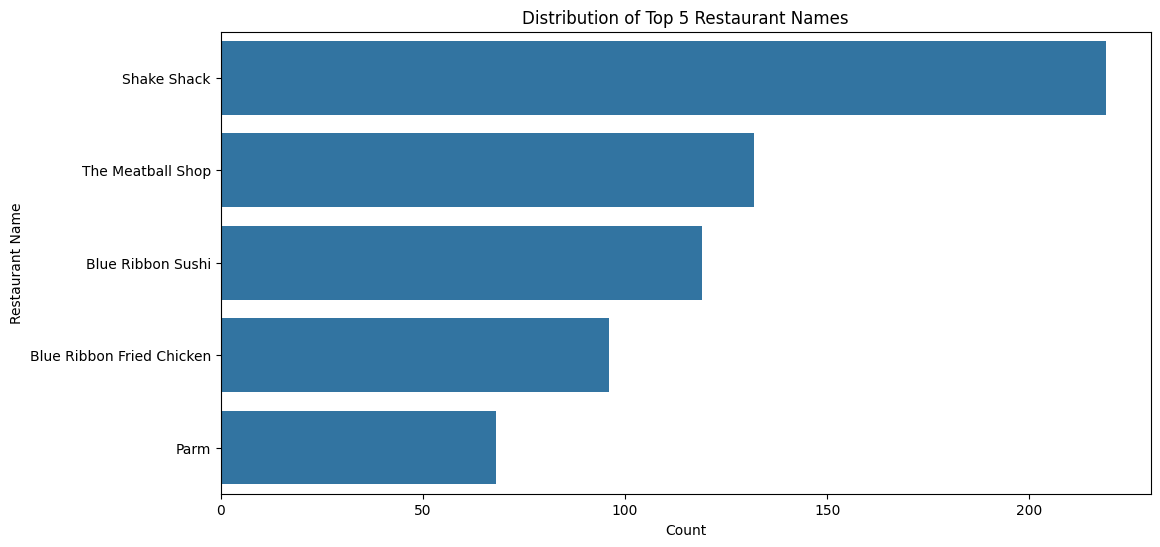

In [11]:
# Display the top 5 restaurants
# Write the code here
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index.tolist()

# Display the top 5 restaurants
print("Top 5 restaurants by order count:")
for restaurant in top_5_restaurants:
    print(restaurant,':', df['restaurant_name'].value_counts()[restaurant])

# Display a countplot of the top 5 restaurants (optional)
plt.figure(figsize=(12, 6))
sns.countplot(y='restaurant_name', data=df, order=top_5_restaurants)
plt.title('Distribution of Top 5 Restaurant Names')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()


#### Observations:
Top 5 restaurants by order count:

Shake Shack : 219

The Meatball Shop : 132

Blue Ribbon Sushi : 119

Blue Ribbon Fried Chicken : 96

Parm : 68


### **Question 8**: Which is the most popular cuisine on weekends?

The most popular cuisine on weekends is: American


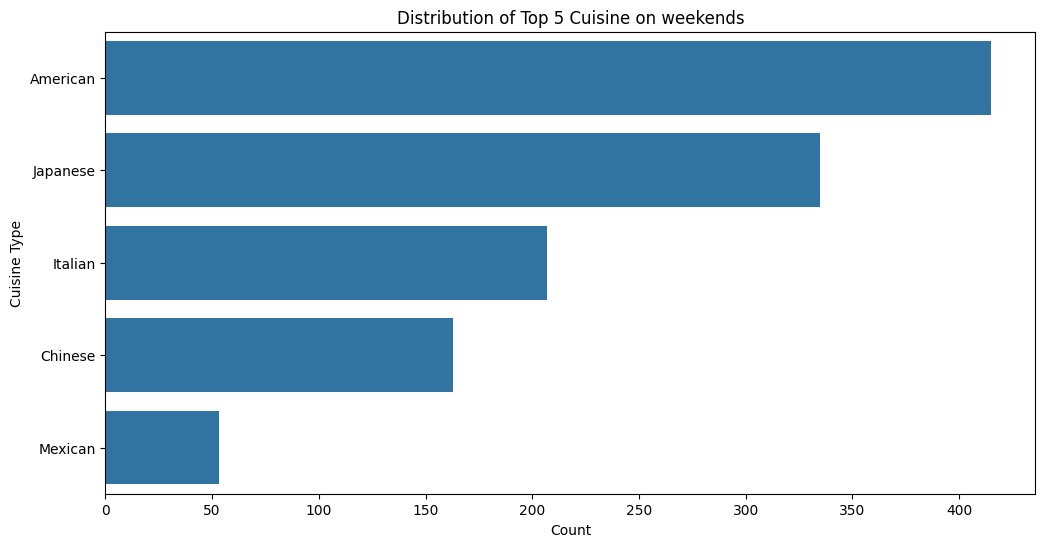

In [12]:
# prompt:  Which is the most popular cuisine on weekends?

# Find the most popular cuisine on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_weekend = weekend_orders['cuisine_type'].mode()[0] # Access the mode value directly
print(f"The most popular cuisine on weekends is: {popular_cuisine_weekend}")

# Get the top 5 most popular cuisines on weekends
most_popular = weekend_orders['cuisine_type'].value_counts().head(5).index.tolist() # Get unique cuisine types

plt.figure(figsize=(12, 6))
sns.countplot(y='cuisine_type', data=weekend_orders, order=most_popular)
plt.title('Distribution of Top 5 Cuisine on weekends')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()


#### Observations:
The most popular cuisine on weekends is: American, followed by Japanese, Italian, Chinese and Mexican.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [13]:
# Write the code here
# prompt:  What percentage of the orders cost more than 20 dollars?

# Calculate the number of orders with a cost greater than $20
orders_over_20 = len(df[df['cost_of_the_order'] > 20])

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_over_20 = (orders_over_20 / total_orders) * 100

# Print the result
print(f"The percentage of orders costing more than $20 is: {percentage_over_20:.2f}%")

The percentage of orders costing more than $20 is: 29.24%


#### Observations:
The percentage of orders costing more than $20 is: 29.24%

### **Question 10**: What is the mean order delivery time?

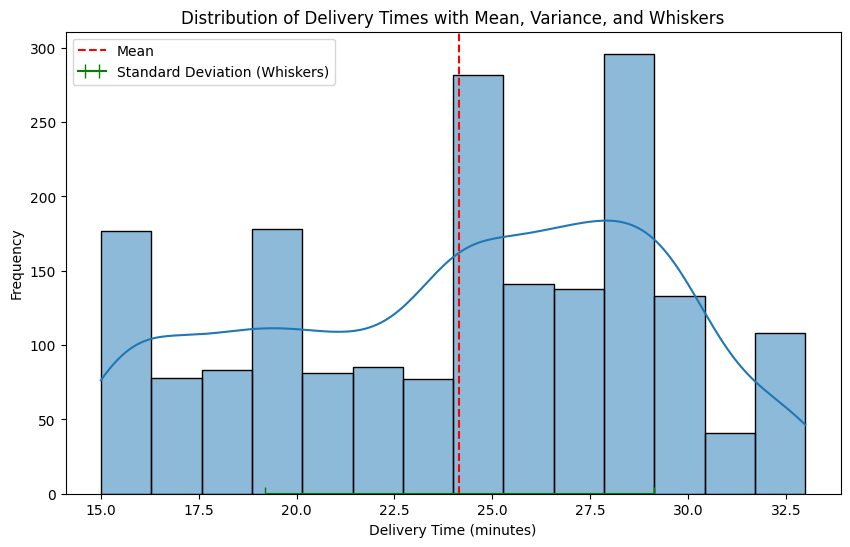

Mean order delivery time:  24.161749209694417


In [14]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

order_delivery_time = df['delivery_time']

# Calculate mean and variance
mean_delivery_time = order_delivery_time.mean()
variance_delivery_time = order_delivery_time.var()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(order_delivery_time, kde=True)  # Add kde for a smoother distribution curve
plt.title('Distribution of Delivery Times with Mean, Variance, and Whiskers')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Add a vertical line for the mean
plt.axvline(mean_delivery_time, color='red', linestyle='--', label='Mean')

# Add whiskers for the variance (using standard deviation as a proxy for whiskers)
std_dev = np.sqrt(variance_delivery_time)
plt.errorbar(mean_delivery_time, 0, xerr=std_dev, color='green', capsize=5, label='Standard Deviation (Whiskers)')
# 0 for y position since errorbar wants a y value for the central point. xerr is the whisker length.

plt.legend()  # Show legend with labels
plt.show()

print("Mean order delivery time: ", order_delivery_time.mean())


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [15]:
# prompt:  The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

# Group the DataFrame by customer_id and count the orders for each customer
customer_order_counts = df.groupby('customer_id')['order_id'].count()

# Sort the customer order counts in descending order
sorted_customer_counts = customer_order_counts.sort_values(ascending=False)

# Get the top 3 customers
top_3_customers = sorted_customer_counts.head(3)

# Print the customer IDs and their order counts
print("Top 3 most frequent customers and their order counts:")
top_3_customers

Top 3 most frequent customers and their order counts:


,order_id
customer_id,
52832,13
47440,10
83287,9




```
`# This is formatted as code`
```

#### Observations:
customer_id

52832	- 13

47440	- 10

83287	- 9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

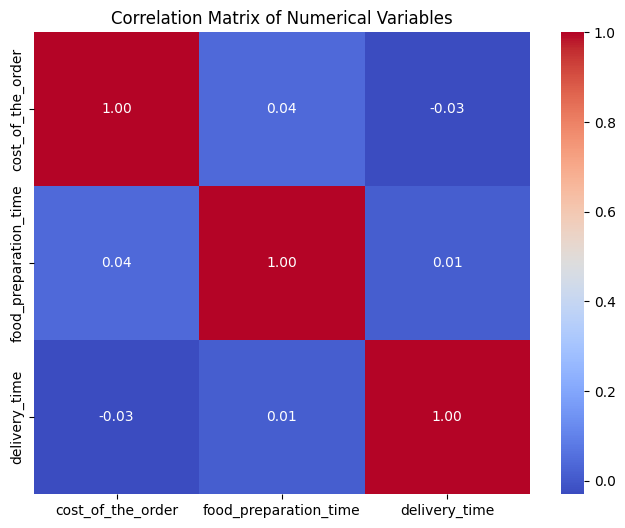

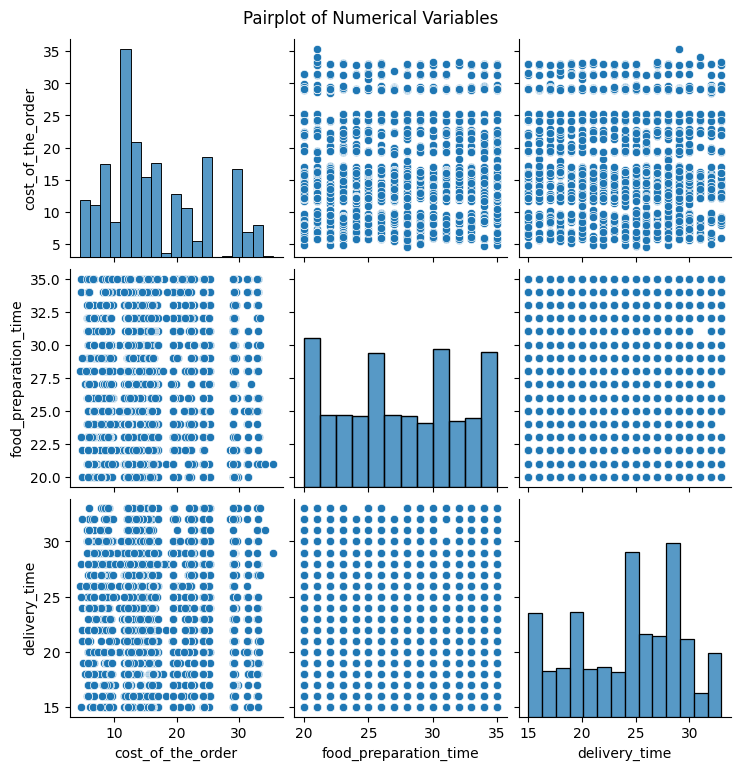

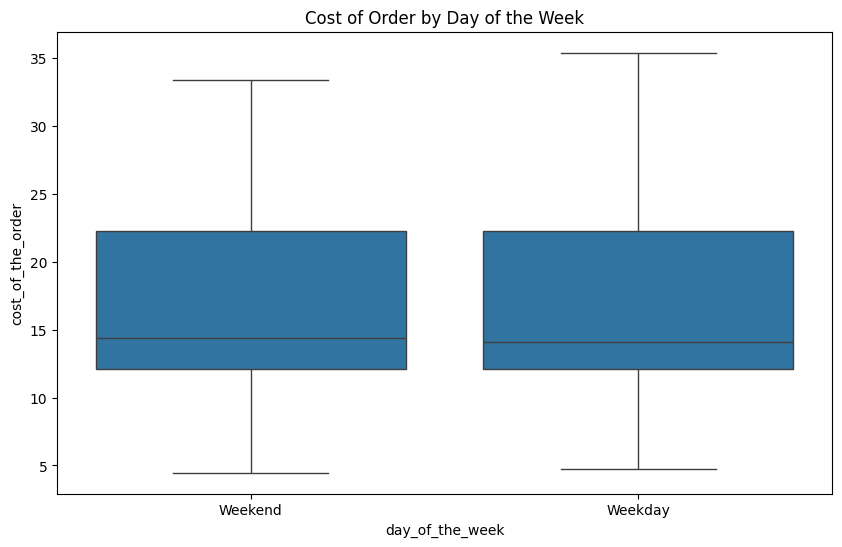

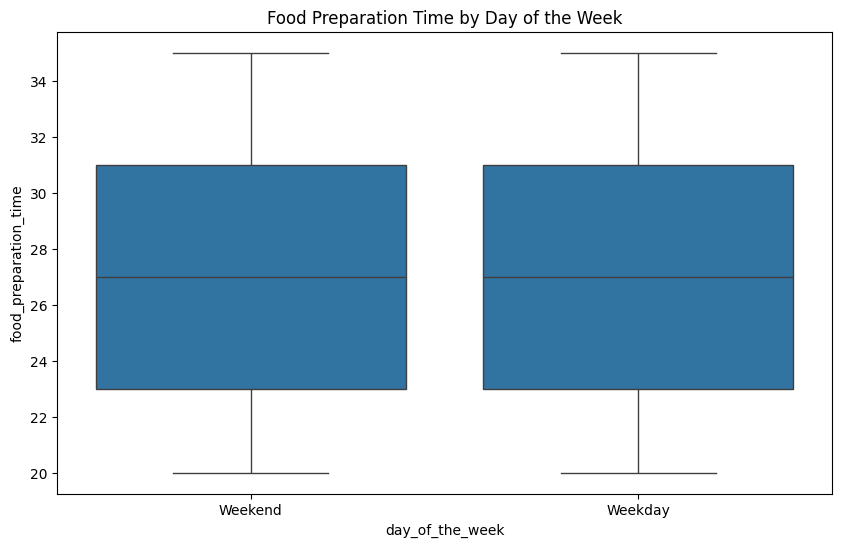

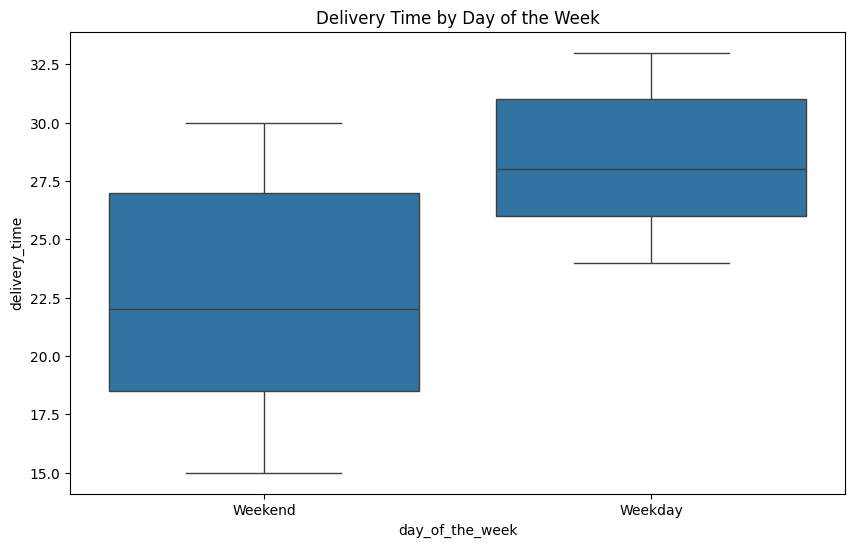

Correlation between rating and order price: 0.03398327217931441


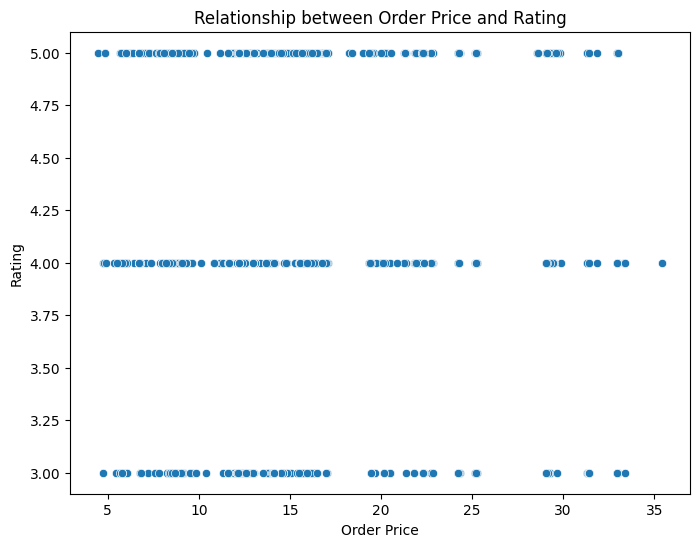

In [16]:
# prompt: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables
# additionally for the correlation between rating and order price

# Correlation Matrix
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Relationship between numerical and categorical variables
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Day of the Week')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Food Preparation Time by Day of the Week')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()


# Convert 'rating' to numeric, handling 'Not given'
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation between rating and order price
correlation_rating_price = df['rating_numeric'].corr(df['cost_of_the_order'])
print(f"Correlation between rating and order price: {correlation_rating_price}")

plt.figure(figsize=(8,6))
sns.scatterplot(x='cost_of_the_order', y='rating_numeric', data=df)
plt.title('Relationship between Order Price and Rating')
plt.xlabel('Order Price')
plt.ylabel('Rating')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [17]:
# prompt: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

# Group by restaurant name and calculate the count and mean of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating_numeric'].agg(['count', 'mean'])

# Filter restaurants based on the criteria
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the restaurants that fulfill the criteria
print("Restaurants fulfilling the criteria for promotional offer:")
promotional_restaurants

Restaurants fulfilling the criteria for promotional offer:


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905




#### Observations:

Blue Ribbon Fried Chicken	64	- 4.328125

Blue Ribbon Sushi	73	- 4.219178

Shake Shack	133	- 4.278195

The Meatball Shop	84	- 4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [18]:
#The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders
revenue = 0
for r in df['cost_of_the_order']:
  if r > 20:
    revenue += r * 0.25
  elif r > 5:
    revenue += r * 0.15

print(f"The net revenue generated by the company is: ${revenue:.2f}")

The net revenue generated by the company is: $6166.30


#### Observations:
The net revenue generated by the company is: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [23]:
# prompt: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

# Calculate the total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders that take more than 60 minutes
orders_over_60_minutes = len(df[df['total_delivery_time'] > 60])

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

# Print the result
print(f"{percentage_over_60_minutes:.2f}% of orders take more than 60 minutes to get delivered.")

10.54% of orders take more than 60 minutes to get delivered.


#### Observations:
10.54% of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [22]:
# prompt: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

# Calculate the mean delivery time for weekdays and weekends
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekday_variance_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].std()
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekend_variance_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].std()

# Print the results
print(f"Mean delivery time on weekdays: {weekday_mean_delivery_time:.2f} minutes and a variance of {weekday_variance_delivery_time:.2f}")
print(f"Mean delivery time on weekends: {weekend_mean_delivery_time:.2f}  and a variance of {weekend_variance_delivery_time:.2f}")

Mean delivery time on weekdays: 28.34 minutes and a variance of 2.89
Mean delivery time on weekends: 22.47  and a variance of 4.63


#### Observations:
Mean delivery time on weekdays: 28.34 minutes and a variance of 8.36

Mean delivery time on weekends: 22.47  and a variance of 21.43

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

Popular Restaurants and Cuisines: Certain restaurants like Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are clear favorites, receiving a high volume of orders. American cuisine is the most popular overall and especially during weekends. This suggests focusing on partnerships and promotions with these top-performing restaurants and cuisines.

Order Cost and Delivery Time: A significant portion (around 29%) of orders cost more than $20. The average delivery time is around 29 minutes. Understanding these metrics can help in optimizing pricing strategies and delivery operations to improve customer satisfaction.

Customer Loyalty: Identifying the top 3 most frequent customers highlights potential for a loyalty program to reward and retain valuable customers. Offering discounts or personalized recommendations could further enhance their experience.

Ratings and Restaurant Performance: There is a correlation between customer ratings and the cost of the order as well as the popularity of cuisines. While a definitive causal link might require further investigation, it indicates that customers tend to rate higher-priced orders or popular cuisines more favorably.

Promotional Opportunities: Identifying restaurants with a rating count greater than 50 and average rating above 4 provides a targeted list for promotional offers. This data-driven approach ensures promotions are offered to restaurants that consistently deliver a good customer experience.


### Recommendations:

1.Targeted Promotions:

Partner with the top 5 restaurants by order count (Shake Shack, The Meatball Shop, etc.) on exclusive promotions or bundled deals to further boost their popularity and attract new customers.
Promote American cuisine, especially on weekends, highlighting popular dishes or offering weekend-specific discounts.
Leverage data on the top 3 most frequent customers to create a loyalty program with personalized offers and rewards, encouraging repeat business.
Delivery Optimization:

Analyze delivery times for different restaurants and areas to identify bottlenecks and optimize delivery routes. This could involve using route optimization software or adjusting delivery zones for efficiency.
Explore options to reduce delivery times for orders that often take longer than 60 minutes. This could involve strategies like order batching or incentivizing drivers for faster delivery in peak hours or specific areas.
Customer Experience Enhancements:

Encourage customers to provide ratings and feedback through in-app prompts or rewards, improving data quality for analysis.
Address concerns or negative reviews regarding specific restaurants or cuisine types to identify areas for improvement and maintain overall customer satisfaction.
Consider introducing new and trending cuisine types based on customer preferences and market trends to diversify options and attract new customer segments.
Pricing Strategies:

Experiment with pricing strategies for higher-priced items to further increase revenue and profitability without sacrificing customer satisfaction. This might include promotional offers or combo deals to add value for the customer.
Continuously monitor and analyze the correlation between ratings, order price, and food preparation time to optimize pricing and improve customer perceptions of value.
Operational Improvements:

Collaborate with restaurants to optimize food preparation times, especially for dishes with consistently longer preparation durations. This could include menu adjustments or kitchen workflow improvements on the restaurant side.
Offer training programs for restaurant staff and delivery personnel focusing on customer service and order handling to ensure a positive experience at each touchpoint.

---